Importing Libraries

In [ ]:
# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Other libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
Loading dataset

In [ ]:
#loading the dataset
df = pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
for column in df.columns:
    df[column] = df[column].astype(float)

Understanding the data

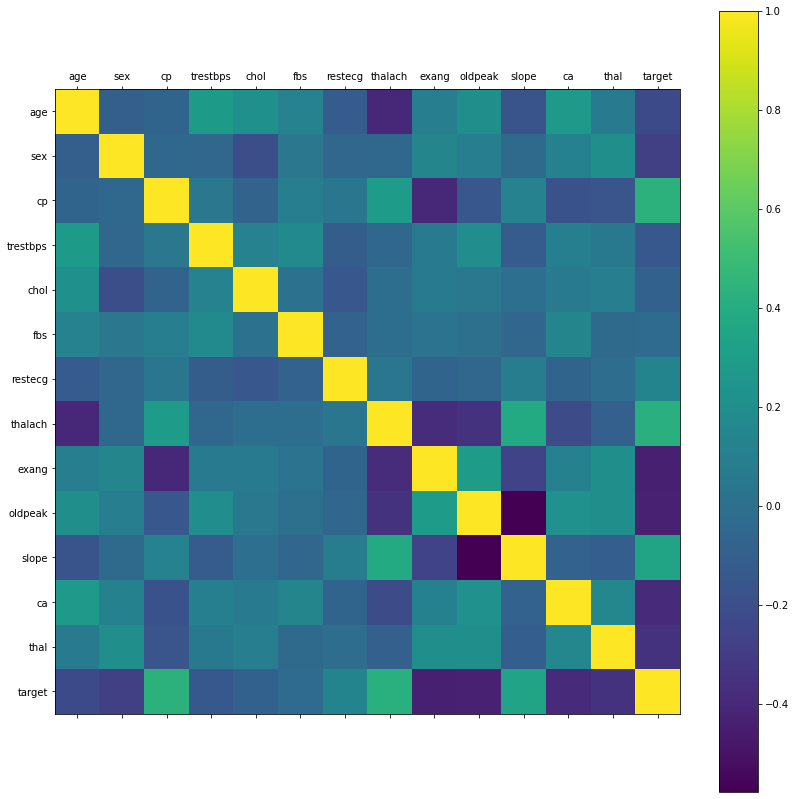

In [ ]:
#plotting the correlation matrix of features
rcParams['figure.figsize'] = 20, 14
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb10a9245c0>,
      dtype=object)

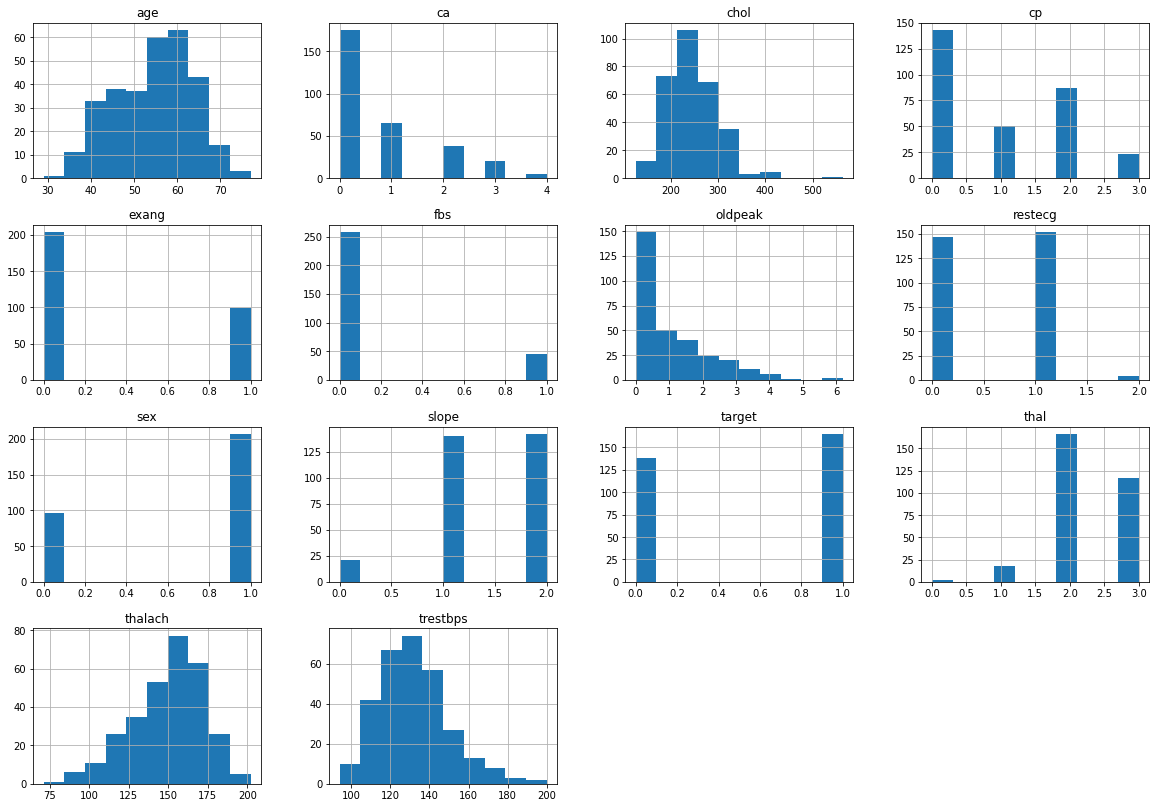

In [ ]:
#Histogram of the features
df.hist()

Text(0.5, 1.0, 'Count of each Target Class')

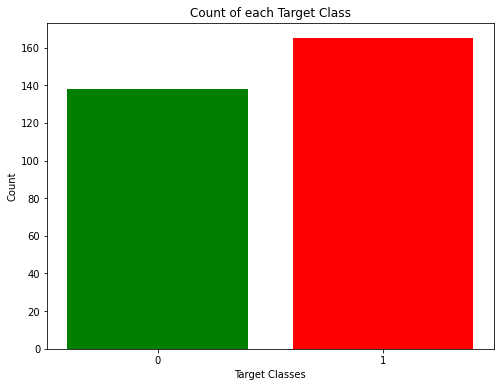

In [ ]:
#Bar Plot for Target Class
rcParams['figure.figsize'] = 8,6
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

Feature Selection

In [ ]:
#Storing the target column into variable y and the features in variable X
y = df['target']
X = df.drop(['target'], axis = 1)

In [ ]:
#the chi-squared (chi²) statistical test for non-negative features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
selectedFeatures=featureScores.nlargest(10,'Score') 
print(selectedFeatures) #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835


In [ ]:
#keep only the best features in the variable X and remove the others using the below line of code
X=df[selectedFeatures['Specs']]

In [ ]:
X.describe()

,thalach,oldpeak,ca,cp,exang,chol,age,trestbps,slope,sex
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,149.646865,1.039604,0.729373,0.966997,0.326733,246.264026,54.366337,131.623762,1.399340,0.683168
std,22.905161,1.161075,1.022606,1.032052,0.469794,51.830751,9.082101,17.538143,0.616226,0.466011
min,71.000000,0.000000,0.000000,0.000000,0.000000,126.000000,29.000000,94.000000,0.000000,0.000000
25%,133.500000,0.000000,0.000000,0.000000,0.000000,211.000000,47.500000,120.000000,1.000000,0.000000
50%,153.000000,0.800000,0.000000,1.000000,0.000000,240.000000,55.000000,130.000000,1.000000,1.000000
75%,166.000000,1.600000,1.000000,2.000000,1.000000,274.500000,61.000000,140.000000,2.000000,1.000000
max,202.000000,6.200000,4.000000,3.000000,1.000000,564.000000,77.000000,200.000000,2.000000,1.000000


Visualizing the Data

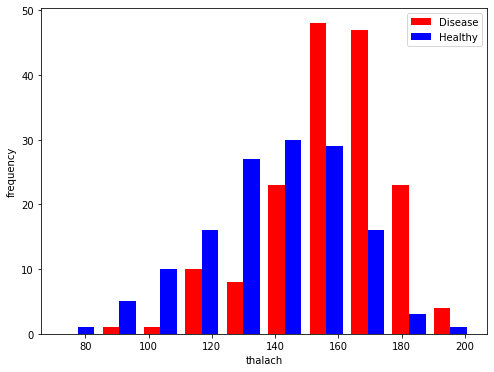

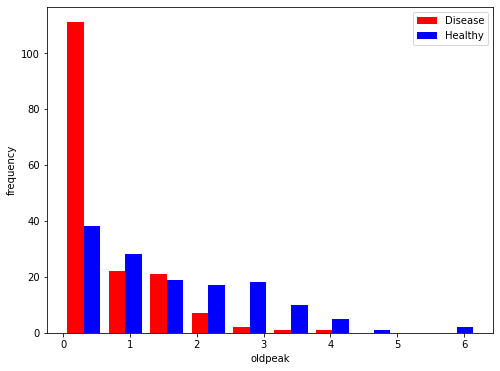

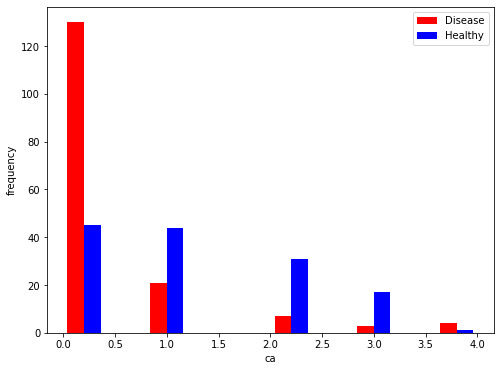

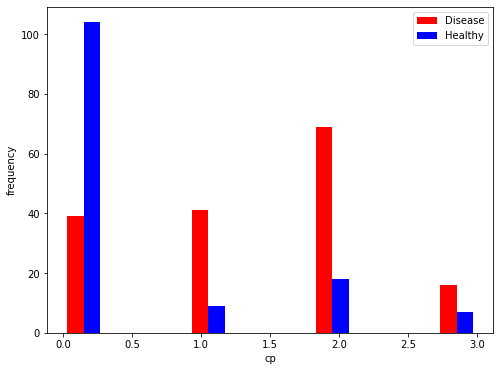

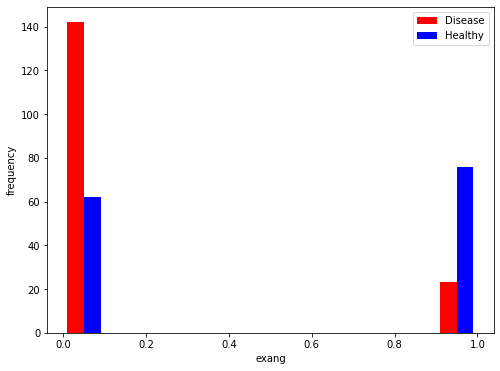

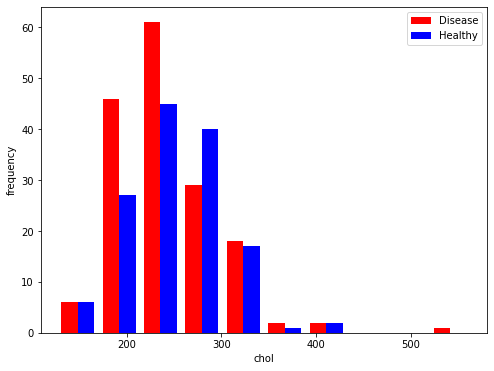

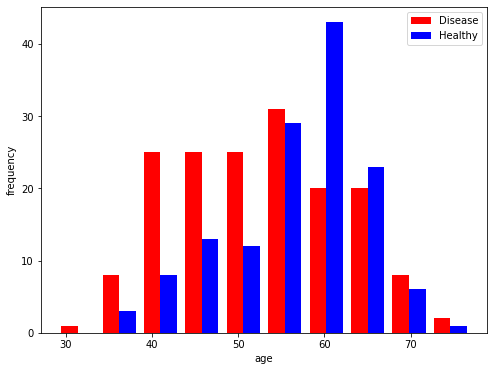

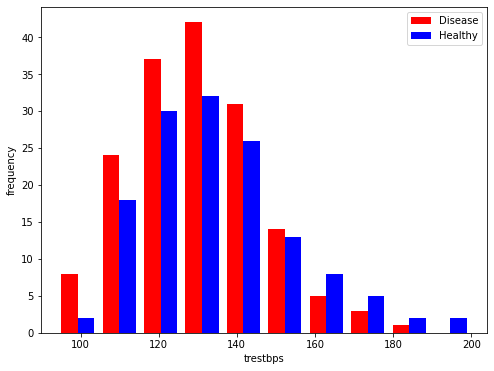

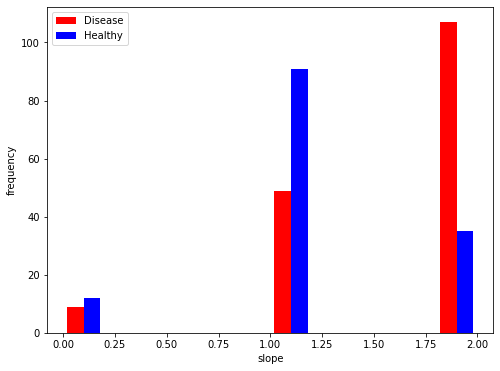

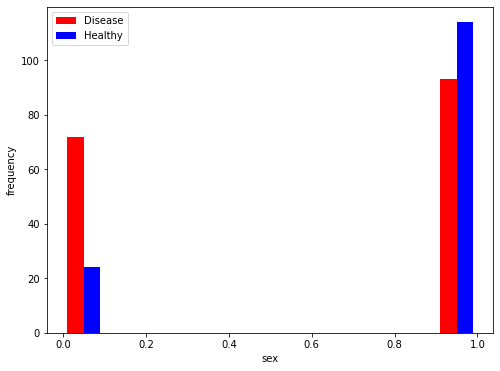

In [ ]:
#Plotting the histograms of all features
columns=['thalach','oldpeak','ca','cp','exang','chol','age','trestbps','slope','sex']
for i in columns:
  disease=[]
  healthy=[]
  for j in range(len(y)):
    if y[j]:
      disease.append(X[i].loc[j])
    else:
      healthy.append(X[i].loc[j])
  x, bins, p=plt.hist([disease,healthy],color=['red','blue'], label=['Disease','Healthy'])
  plt.xlabel(i)
  plt.ylabel('frequency')
  plt.legend()
  plt.show() 

Data Processing

In [ ]:
#To work with categorical variables, we should break each categorical column into dummy columns with 1s and 0s.
X = pd.get_dummies(X, columns = ['sex', 'cp',   'exang', 'slope', 'ca'])

#Next, we need to scale the dataset for which we will use the StandardScaler.
standardScaler = StandardScaler()

#The fit_transform() method of the scaler scales the data and we update the columns.
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X[columns_to_scale] = standardScaler.fit_transform(X[columns_to_scale])

Training and Testing the Model

In [ ]:
#splitting the dataset for testing and training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [ ]:
#training and testing K Neighbors Classifier
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

In [ ]:
#training and testing Support Vector Classifier
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

In [ ]:
#training and testing Decision Tree Classifier
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

In [ ]:
#training and testing Random Forest Classifier
rf_scores = []
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    rf_scores.append(rf_classifier.score(X_test, y_test))

Evaluation of Model

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

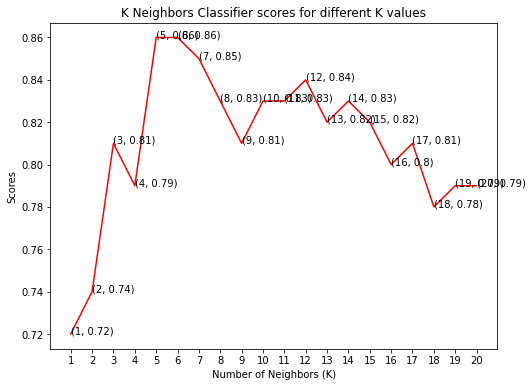

In [ ]:
#Evaluation of K Neighbours Classifier
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

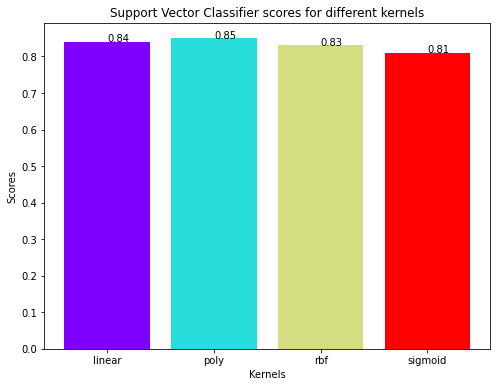

In [ ]:
#Evaluation of Support Vector Classifier
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

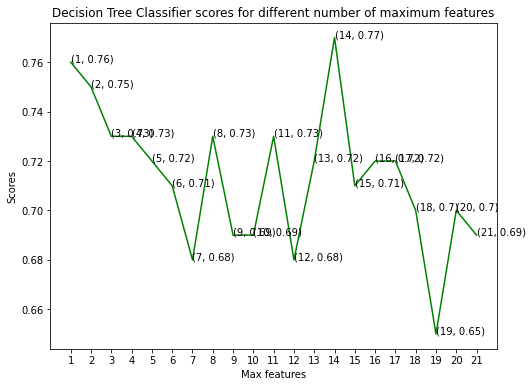

In [ ]:
#Evaluation of Decision Tree Classifier
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

Text(0.5, 1.0, 'Random Forest Classifier scores for different number of estimators')

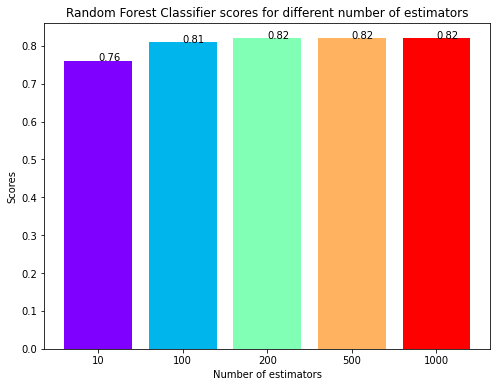

In [ ]:
#Evaluation of Random Forest Classifier
colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])
plt.xticks(ticks = [i for i in range(len(estimators))], labels = [str(estimator) for estimator in estimators])
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')